In [1]:
import sys
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']


In [2]:
def plot_results(ax, df, true_col, pred_col, set_name, model_name, fmt='o', 
        alpha=0.5, label='training', ax_title=''):
    # df = df[df[true_col] > 0]
    df = df[df[pred_col] <= 159]

    rmse = (((df[true_col] - df[pred_col])**2).mean())**0.5
    mae = (abs(df[true_col] - df[pred_col])).mean()
    print (rmse, mae)

    df = df[[true_col, pred_col]]
    max_val = df.max().max()*1.05
    print (df.max())
    dfp = df.pivot(columns=true_col, values=pred_col)
    x = dfp.columns
    y = dfp.mean()
    posyerr = dfp.max() - dfp.mean()
    negyerr = dfp.mean() - dfp.min()
    yerr = dfp.std()
    ax.errorbar(x, y, yerr=yerr, fmt=fmt, lw=1, ms=4, alpha=alpha, label=label)
    ax.legend()
    ax.plot((0, 1000), (0, 1000), ls="--", c="darkgray", lw=1.2)
    ax.tick_params('y', which='minor', left='off')
    # if set_name == 'testing':
        # ax.text(0, max_val*0.8, 'Test RMSE: {}'.format(round(rmse, 2)), 
                # ha='left')
        # ax.text(0, max_val*0.75, 'Test MAE: {}'.format(round(mae, 2)), 
                # ha='left')
    ax.set_title(ax_title)
    ax.set_xlim((-5, max_val))
    ax.set_ylim((-5, max_val))
    ax.set_xticks(range(0,160,25))
    ax.set_yticks(range(0,160,25))
    ax.set_xticklabels(range(0,160,25))
    ax.set_yticklabels(range(0,160,25))
    ax.set_xlabel('True number of flood reports')
    ax.set_ylabel('Predicted number of flood reports')
    ax.set_aspect('equal', adjustable='box-forced')
    return ax

In [3]:
def plot_trn_tst_together(model_type, suffix, axs, ax_title=''):
    df_trn_res = pd.read_csv('../data/{}_{}_train.csv'.format(model_type, suffix), 
                             header=-1)
    axs = plot_results(axs, df_trn_res, 1, 2, 'training', 
                       model_type, label='training', alpha=0.5, 
                       ax_title=ax_title)
    df_tst_res = pd.read_csv('../data/{}_{}_test.csv'.format(model_type, suffix), 
                             header=-1)
    axs = plot_results(axs, df_tst_res, 1, 2, 'testing', 
                       model_type, fmt='v', alpha=0.5, label='evaluation', 
                       ax_title=ax_title)
    return axs

In [4]:
def plot_model_seperately(model_type, suffix):
    fig,axs = plt.subplots(nrows=1, ncols=1, squeeze=True, sharey=True, 
                           sharex=True, figsize=(3.5, 3.5))
    plot_trn_tst_together(model_type, suffix, axs)
    plt.tight_layout()
    plt.savefig('../data/results_{}_{}.png'.format(model_type, suffix), 
                dpi=300)
    plt.savefig('../data/results_{}_{}.eps'.format(model_type, suffix), 
                dpi=1000)
    plt.show()

In [5]:
def plot_side_by_side(models, suffix):
    fig,axs = plt.subplots(nrows=1, ncols=2, squeeze=True, sharey=True, 
                           sharex=True, figsize=(6.5, 3.5))
    axs = axs.ravel()
    labels = ['Poisson Regression', 'Random Forest']
    for i, m in enumerate(models):
        plot_trn_tst_together(m, suffix, axs[i], labels[i])
    plt.tight_layout()
    plt.savefig('../data/{}_results_together.png'.format(suffix), dpi=300)
    plt.savefig('../data/{}_results_together.eps'.format(suffix), dpi=1000)
    plt.show()


plotting for poisson
1.014812542902959 0.1710596613368409
1    159.000000
2    158.992345
dtype: float64
6.515572083620591 0.8227964628973149
1    159.000000
2    156.322506
dtype: float64


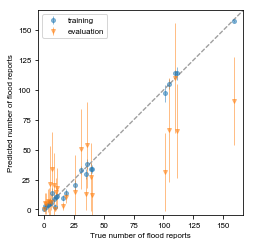

plotting for rf
1.8711008038420642 0.25210453449716663
1    159.0000
2    133.5085
dtype: float64
4.292463065202305 0.6360043017122237
1    159.000
2    111.059
dtype: float64


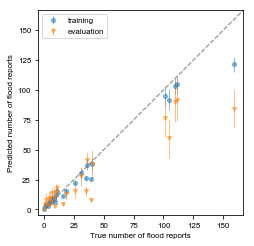

In [6]:
try:
    #suffix = sys.argv[1]
    suffix = 'out'
except IndexError:
    raise IndexError("No argument given for suffix, should be first command \
                     line arg")

models = ['poisson', 'rf']
for m in models:
    print ("plotting for {}".format(m))
    plot_model_seperately(m, suffix)

#plot_side_by_side(models, suffix)
